In [2]:
#! pip install plydata
! pip install ipyleaflet

import pandas as pd
import numpy as np
import statsmodels.api as sm
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import calendar
import networkx as nx
import ipywidgets
import geopandas
import sys
import types
import statsmodels.api as sm

#sklearn.feature_selection.SequentialFeatureSelector




from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from ipyleaflet import Heatmap, Map, Marker, basemaps, GeoJSON, GeoData
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from datetime import datetime, date
from plydata import define
from plydata.expressions import case_when
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
import datetime


from sklearn.metrics import mean_squared_error
#rms = mean_squared_error(y_actual, y_predicted, squared=False)

!! jupyter --version

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\rfaro\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


['Selected Jupyter core packages...',
 'IPython          : 7.29.0',
 'ipykernel        : 6.4.1',
 'ipywidgets       : 7.6.5',
 'jupyter_client   : 6.1.12',
 'jupyter_core     : 4.8.1',
 'jupyter_server   : 1.4.1',
 'jupyterlab       : 3.2.1',
 'nbclient         : 0.5.3',
 'nbconvert        : 6.1.0',
 'nbformat         : 5.1.3',
 'notebook         : 6.4.5',
 'qtconsole        : 5.1.1',
 'traitlets        : 5.1.0']

In [4]:
df = pd.read_csv('C:/Users/rfaro/OneDrive/Desktop/Professional Documents/github_portfolio_project/api_data.csv')
df.head()

,date,year,month,quarter,store,name,address,city,zipcode,county_number,...,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
0,2016-03-07,2016,3,2016Q1,2613,HY-VEE FOOD STORE #1 / COUNCIL BLUFF,2323 W BROADWAY,COUNCIL BLUFFS,51501,78.0,...,10627,CANADIAN CLUB WHISKY,12,1000,9.71,14.57,12,174.84,12.00,3.17
1,2016-03-03,2016,3,2016Q1,3678,"SMOKE SHOP, THE",1918 SE 14TH ST,DES MOINES,50320,77.0,...,45248,PARAMOUNT GOLD RUM,6,1750,7.84,11.76,6,70.56,10.50,2.77
2,2016-03-07,2016,3,2016Q1,4984,FAST AVE ONE STOP,2111 PARK AVE,MUSCATINE,52761,70.0,...,4716,CHIVAS REGAL 12 YR,12,750,18.49,27.74,1,27.74,0.75,0.20
3,2016-03-03,2016,3,2016Q1,2626,HY-VEE DRUGSTORE / UNIVERSITY / DSM,4100 UNIVERSITY AVE,DES MOINES,50311,77.0,...,22786,BEAM'S 8 STAR BL WHISKEY,12,750,3.93,5.90,12,70.80,9.00,2.38
4,2016-03-08,2016,3,2016Q1,2522,HY-VEE WINE AND SPIRITS / SPIRIT LAK,HWY 9 & 71,SPIRIT LAKE,51360,30.0,...,15776,BUSHMILLS IRISH WHISKEY,12,750,13.50,20.25,3,60.75,2.25,0.59


In [17]:
# df['day'] = df['date'].dt.day

AttributeError: 'Series' object has no attribute 'day'

In [5]:
df.describe()

,year,month,store,county_number,category,vendor_no,itemno,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
count,1000.0,1000.000000,1000.000000,959.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2016.0,2.949000,3656.900000,56.958290,1.040326e+06,261.865000,42843.685000,12.790000,888.650000,9.523570,14.287610,9.365000,123.554640,7.825140,2.067570
std,0.0,0.220108,976.504228,27.799204,3.261320e+04,137.776853,22804.838775,7.807615,499.006699,7.230024,10.845138,18.856069,453.551348,18.082599,4.776834
min,2016.0,2.000000,2106.000000,1.000000,1.011100e+06,35.000000,258.000000,1.000000,100.000000,0.890000,1.340000,1.000000,3.000000,0.200000,0.050000
25%,2016.0,3.000000,2616.000000,31.000000,1.012200e+06,115.000000,26987.000000,10.000000,750.000000,5.427500,8.145000,2.000000,27.180000,1.500000,0.400000
50%,2016.0,3.000000,3750.000000,63.000000,1.031200e+06,260.000000,37994.000000,12.000000,750.000000,7.870000,11.810000,6.000000,67.260000,4.500000,1.190000
75%,2016.0,3.000000,4549.500000,77.000000,1.062300e+06,380.000000,58835.750000,12.000000,1000.000000,11.500000,17.250000,12.000000,134.520000,10.500000,2.770000
max,2016.0,3.000000,5227.000000,99.000000,1.701100e+06,971.000000,89846.000000,48.000000,6000.000000,99.990000,149.990000,480.000000,13315.200000,480.000000,126.800000


In [6]:
df.nunique() 

date                    13
year                     1
month                    2
quarter                  1
store                  492
name                   491
address                493
city                   188
zipcode                221
county_number           89
county                  89
category                53
category_name           52
vendor_no               40
vendor_name             40
itemno                 562
im_desc                411
pack                     7
bottle_volume_ml        12
state_bottle_cost      306
state_bottle_retail    306
sale_bottles            24
sale_dollars           571
sale_liters             51
sale_gallons            51
dtype: int64

C:\Users\rfaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


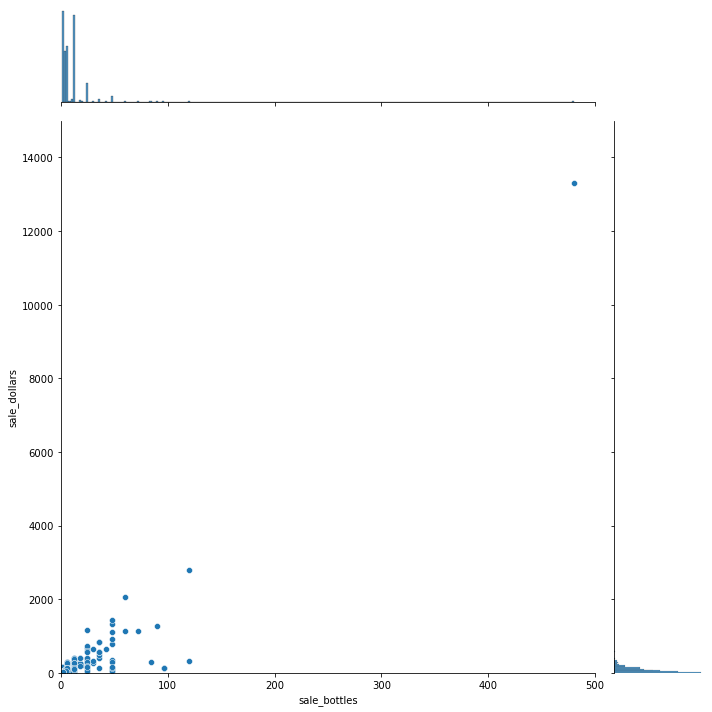

In [8]:
#unsurprisingly, a very strong correlation between bottles sold and sales ($)
sns.jointplot('sale_bottles','sale_dollars',df,xlim = (0,500), ylim = (0,15000),height=10)

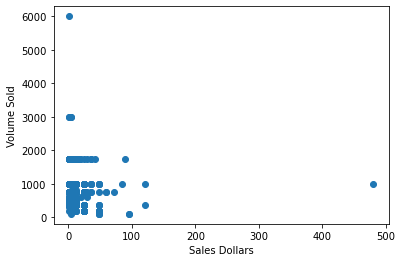

In [10]:
plt.scatter(df['sale_bottles'], df['bottle_volume_ml'])
plt.xlabel('Sales Dollars')
plt.ylabel('Volume Sold')
plt.show()

In [ ]:
date 
year
month
quarter
store
name
address
city
zipcode                221
county_number           89
county                  89
category                53
category_name           52
vendor_no               40
vendor_name             40
itemno                 562
im_desc                411
pack                     7
bottle_volume_ml        12
state_bottle_cost      306
state_bottle_retail    306
sale_bottles            24
sale_dollars           571
sale_liters             51
sale_gallons            51

In [11]:
# df[['date', 'year','Season','Average_Household_Income','Average_Household_Income',
#          'State_Bottle_Retail','Volume_Sold_Liters']].corr()


df.corr()

,year,month,store,county_number,category,vendor_no,itemno,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.021670,-0.035646,0.010595,-0.019405,-0.053606,0.052592,-0.008237,-0.016812,-0.016808,0.007143,0.006917,0.000084,0.000082
store,NaN,-0.021670,1.000000,0.074528,0.031643,-0.016944,0.024682,0.098610,-0.061965,-0.069550,-0.069532,0.030384,-0.026848,-0.025565,-0.025537
county_number,NaN,-0.035646,0.074528,1.000000,0.005221,-0.005319,0.045814,0.104440,-0.156325,-0.064619,-0.064602,0.018665,-0.009311,-0.034011,-0.033957
category,NaN,0.010595,0.031643,0.005221,1.000000,0.172568,0.474049,-0.017446,0.004976,-0.057439,-0.057445,0.003380,-0.017930,-0.011818,-0.011828
vendor_no,NaN,-0.019405,-0.016944,-0.005319,0.172568,1.000000,0.231027,-0.043282,0.029543,0.020935,0.020918,0.024520,0.020272,0.034509,0.034495
itemno,NaN,-0.053606,0.024682,0.045814,0.474049,0.231027,1.000000,0.052488,-0.120314,-0.082633,-0.082640,-0.032521,-0.050077,-0.056800,-0.056807
pack,NaN,0.052592,0.098610,0.104440,-0.017446,-0.043282,0.052488,1.000000,-0.615285,-0.373847,-0.373839,0.174400,-0.032534,-0.084098,-0.083946
bottle_volume_ml,NaN,-0.008237,-0.061965,-0.156325,0.004976,0.029543,-0.120314,-0.615285,1.000000,0.414529,0.414530,-0.052882,0.047786,0.176663,0.176409
state_bottle_cost,NaN,-0.016812,-0.069550,-0.064619,-0.057439,0.020935,-0.082633,-0.373847,0.414529,1.000000,1.000000,-0.050181,0.129284,0.044901,0.044857


In [12]:
df['city'].value_counts()

DES MOINES      83
CEDAR RAPIDS    59
DAVENPORT       46
WATERLOO        37
IOWA CITY       33
                ..
OKOBOJI          1
LISBON           1
ORANGE CITY      1
HUDSON           1
MADRID           1
Name: city, Length: 188, dtype: int64

In [13]:
df.isnull().sum()

date                    0
year                    0
month                   0
quarter                 0
store                   0
name                    0
address                 0
city                    0
zipcode                 0
county_number          41
county                 41
category                0
category_name           1
vendor_no               0
vendor_name             0
itemno                  0
im_desc                 0
pack                    0
bottle_volume_ml        0
state_bottle_cost       0
state_bottle_retail     0
sale_bottles            0
sale_dollars            0
sale_liters             0
sale_gallons            0
dtype: int64

In [14]:
print(df.shape)

(1000, 25)


In [15]:
df.drop_duplicates()
df.shape

# no duplicates

(1000, 25)

In [18]:
print(df['date'].min())
print(df['date'].max())

2016-02-23
2016-03-15
